In [1]:
import pandas as pd
import numpy as np
from wrangle import *
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")


### Exercises

Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.



1. Select a dataset with a continuous target variable. 
2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples. 
3. Work through **all** of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [2]:
df=prep_zillow_2017(k=1.25)


Number of observations removed: 18684
This is our percent change after removing all the outliers and then the nulls:
 -33.33%
mean kurt:
-0.3094772441000198


None

In [3]:

cols=set(df.columns.to_list())
colsdropa={'id','yearbuilt', 'bathdividesbed',
 'beddividestaxval',
 'bathdividestaxval',
 'areadividestaxval',
 'bedbathbeyonddividestaxval',
 'beddividesarea',
 'bathdividesarea',
 'bathplusbathdividesarea',
 'bathplusbathdividesarea_dividestavval','logerror'}

minwithdecade=cols-colsdropa

colsdropb=colsdropa-{'yearbuilt'}
colsdropb.add('decade')
minwithyearsbuilt=cols-colsdropb
mvp={'bathroomcnt','bedroomcnt','area','taxvaluedollarcnt'}

print(f'''mvp:\n{mvp}\nminwithdecade:\n{minwithdecade}\nminwithyearsbuilt\n{minwithyearsbuilt} ''')

mvp:
{'taxvaluedollarcnt', 'bedroomcnt', 'bathroomcnt', 'area'}
minwithdecade:
{'decade', 'fips', 'area', 'taxvaluedollarcnt', 'bedroomcnt', 'bathroomcnt'}
minwithyearsbuilt
{'fips', 'area', 'taxvaluedollarcnt', 'bedroomcnt', 'bathroomcnt', 'yearbuilt'} 


In [4]:
mvp_df=df[list(mvp)]



X_train, y_train, X_validate, y_validate, X_test, y_test=train_validate_test(mvp_df,target='taxvaluedollarcnt')

In [5]:

# make a list to store model rmse in
rmse_list=[]
model_name_list=[]

# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
## adding y_test to be used at the end
y_test = pd.DataFrame(y_test)

# 1. Predict taxvaluedollarcnt_pred_mean
taxvaluedollarcnt_pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean
y_validate['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean

# 2. compute taxvaluedollarcnt_pred_median
taxvaluedollarcnt_pred_median = y_train['taxvaluedollarcnt'].median()
y_train['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median
y_validate['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median

# 3. RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean)**(1/2)

print(f'''RMSE using Mean\nTrain/In-Sample: {rmse_train:.4g}
      \nValidate/Out-of-Sample: \n {rmse_validate:.4g}''')
rmse_list.append([rmse_train,rmse_validate])
model_name_list.append('RMSE using Mean')

RMSE using Mean
Train/In-Sample: 2.09e+05
      
Validate/Out-of-Sample: 
 2.084e+05


In [6]:
# 4. RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median)**(1/2)
print(f'''RMSE using Median\nTrain/In-Sample: {rmse_train:.4g}
      \nValidate/Out-of-Sample: \n {rmse_validate:.4g}''')

rmse_list.append([rmse_train,rmse_validate])
model_name_list.append('RMSE using Median')

RMSE using Median
Train/In-Sample: 2.124e+05
      
Validate/Out-of-Sample: 
 2.112e+05


In [7]:
# 1. Predict taxvaluedollarcnt_pred_mode
taxvaluedollarcnt_pred_mode = y_train['taxvaluedollarcnt'].mode()[0]
y_train['taxvaluedollarcnt_pred_mode'] = taxvaluedollarcnt_pred_mode
y_validate['taxvaluedollarcnt_pred_mode'] = taxvaluedollarcnt_pred_mode


# 2. RMSE of taxvaluedollarcnt_pred_mode
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mode)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mode)**(1/2)

print(f'''RMSE using Mode\nTrain/In-Sample: {rmse_train:.2g}
      \nValidate/Out-of-Sample: \n {rmse_validate:.2g}''')
rmse_list.append([rmse_train,rmse_validate])
model_name_list.append('RMSE using Mode')

RMSE using Mode
Train/In-Sample: 2.8e+05
      
Validate/Out-of-Sample: 
 2.8e+05


In [8]:
y_train

taxvaluedollarcnt  taxvaluedollarcnt_pred_mean  \
54927           227005.0                335531.196351   
6696            355445.0                335531.196351   
11797            69951.0                335531.196351   
45380            62542.0                335531.196351   
42811           175200.0                335531.196351   
...                  ...                          ...   
48385           116293.0                335531.196351   
41589           351283.0                335531.196351   
27839           183234.0                335531.196351   
41617           707269.0                335531.196351   
41350           488028.0                335531.196351   

       taxvaluedollarcnt_pred_median  taxvaluedollarcnt_pred_mode  
54927                       297800.0                     520000.0  
6696                        297800.0                     520000.0  
11797                       297800.0                     520000.0  
45380                       297800.0                     520000.0  
42811                       297800.0                     520000.0  
...                              ...                          ...  
48385                       297800.0                     520000.0  
41589                       297800.0                     520000.0  
27839                       297800.0                     520000.0  
41617                       297800.0                     520000.0  
41350                       297800.0                     520000.0  

[20937 rows x 4 columns]

In [9]:
# plot to visualize actual vs predicted. 
# plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Tax Values")
# plt.hist(y_train.taxvaluedollarcnt_pred_mean, bins=1, color='red', alpha=.5, rwidth=1e4, label="Predicted Tax Values - Mean")
# plt.hist(y_train.taxvaluedollarcnt_pred_median, bins=1, color='orange', alpha=.5, rwidth=1e5, label="Predicted Tax Values - Median")
# plt.xlabel("Tax Value (Single Family Properties)")
# plt.ylabel("Number of Single Family Properties")
# plt.ylim(top=5000)
# plt.legend()
# plt.show()

In [10]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)**(1/2)


print(f'''RMSE for OLM \nTrain/In-Sample: {rmse_train:.4g}
      \nValidate/Out-of-Sample: \n {rmse_validate:.4g}''')
rmse_list.append([rmse_train,rmse_validate])
model_name_list.append('RMSE for OLM ')

RMSE for OLM 
Train/In-Sample: 1.875e+05
      
Validate/Out-of-Sample: 
 1.875e+05


In [11]:



# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)**(1/2)


print(f'''RMSE for Lasso + Lars\nTraining/In-Sample: :  {rmse_train:.4g}
 \nValidate/Out-of-Sample: \n {rmse_validate:.4g}''')

rmse_list.append([rmse_train,rmse_validate])
model_name_list.append('RMSE for Lasso + Lars ')

RMSE for Lasso + Lars
Training/In-Sample: :  1.876e+05
 
Validate/Out-of-Sample: 
 1.875e+05


In [12]:


# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm)**(1/2)


print(f'''RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample:  {rmse_train:.4g}
      "\nValidate/Out-of-Sample: \n {rmse_validate:.4g}''')
rmse_list.append([rmse_train,rmse_validate])
model_name_list.append('RMSE for Tweedie, power=1 & alpha=0')

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  2.09e+05
      "
Validate/Out-of-Sample: 
 2.084e+05


In [13]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)


In [14]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2)**(1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)**(1/2)

print(f'''RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: :  {rmse_train:.4g}
 \nValidate/Out-of-Sample: \n {rmse_validate:.4g}''')

rmse_list.append([rmse_train,rmse_validate])
model_name_list.append('RMSE for Polynomial Model')



RMSE for Polynomial Model, degrees=2
Training/In-Sample: :  1.874e+05
 
Validate/Out-of-Sample: 
 1.875e+05


In [15]:
modelsresmedict=dict(zip(model_name_list,rmse_list))
rmseDF=pd.DataFrame(data=modelsresmedict,index=['Train','Validate'])
rmseDF=rmseDF.T
rmseDF['diff']=rmseDF.Train-rmseDF.Validate
rmseDF['abs_diff']=rmseDF['diff'].apply(abs)
rmseDF.sort_values(by=['abs_diff'],inplace=True)

rmseDF.applymap(lambda x:f'{x:.4g}')

Train   Validate    diff abs_diff
RMSE for Polynomial Model            1.874e+05  1.875e+05  -44.73    44.73
RMSE for OLM                         1.875e+05  1.875e+05   81.17    81.17
RMSE for Lasso + Lars                1.876e+05  1.875e+05   83.35    83.35
RMSE using Mean                       2.09e+05  2.084e+05   610.6    610.6
RMSE for Tweedie, power=1 & alpha=0   2.09e+05  2.084e+05   610.6    610.6
RMSE using Median                    2.124e+05  2.112e+05    1202     1202
RMSE using Mode                      2.788e+05  2.805e+05   -1768     1768

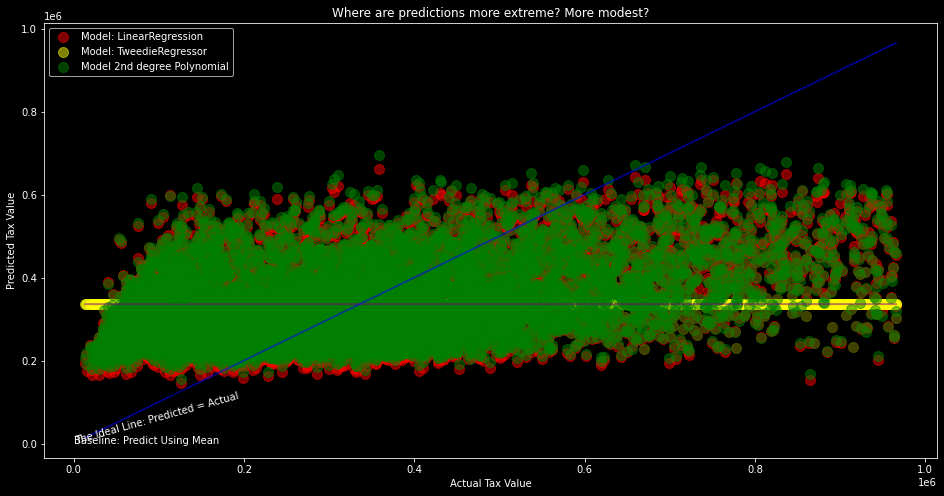

In [16]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean, alpha=.5, color="purple", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5+3, 3.5+3), rotation=15.5)

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()





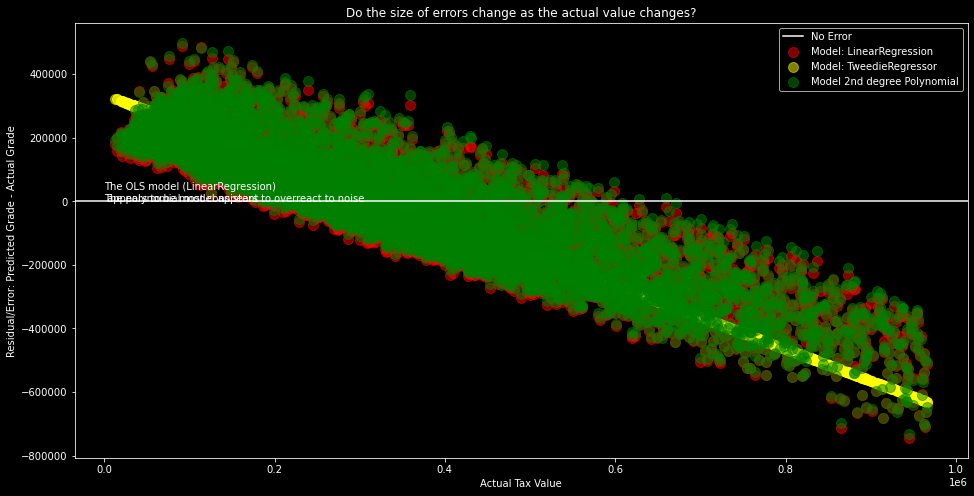

In [17]:

# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm-y_validate.taxvaluedollarcnt, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm-y_validate.taxvaluedollarcnt, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2-y_validate.taxvaluedollarcnt, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Grade - Actual Grade")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()



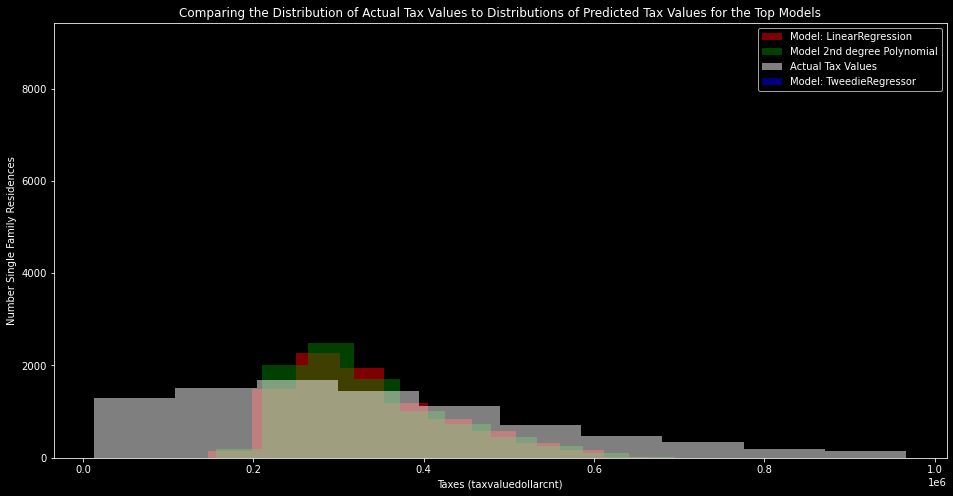

In [18]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))

plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")

plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.hist(y_validate.taxvaluedollarcnt, color='white', alpha=.5, label="Actual Tax Values")
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='blue', alpha=.5, label="Model: TweedieRegressor")
plt.xlabel("Taxes (taxvaluedollarcnt)")
plt.ylabel("Number Single Family Residences")
plt.title("Comparing the Distribution of Actual Tax Values to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()


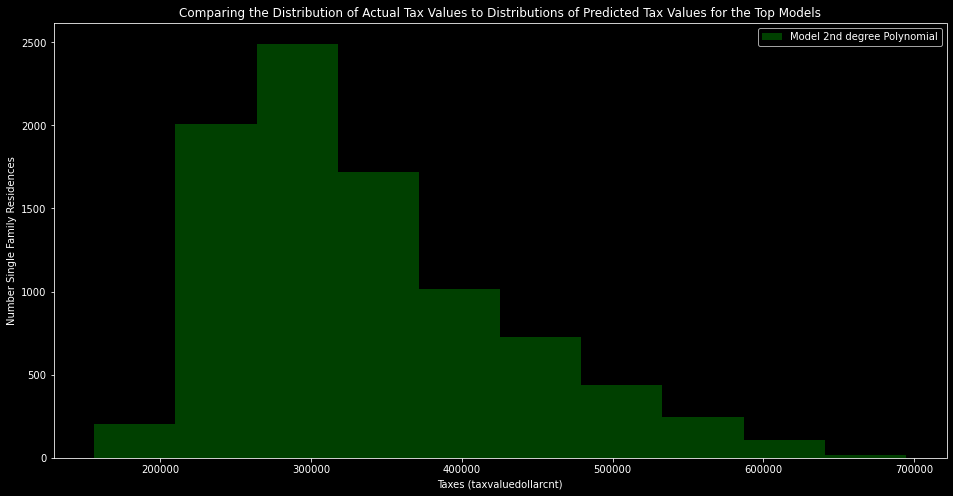

In [19]:
plt.figure(figsize=(16,8))

# plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")

plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
# plt.hist(y_validate.taxvaluedollarcnt, color='white', alpha=.5, label="Actual Tax Values")
# plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='blue', alpha=.5, label="Model: TweedieRegressor")
plt.xlabel("Taxes (taxvaluedollarcnt)")
plt.ylabel("Number Single Family Residences")
plt.title("Comparing the Distribution of Actual Tax Values to Distributions of Predicted Tax Values for the Top Models")
plt.legend()
plt.show()



In [20]:
y_test



taxvaluedollarcnt
52266           380734.0
13109           232343.0
9079            433654.0
14219           347453.0
28833           574208.0
...                  ...
37164           368000.0
43942           464751.0
22380           551739.0
43978           562772.0
7304            488000.0

[7478 rows x 1 columns]

In [21]:

# predict on test
y_test['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_test_degree2)


# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, (y_test.taxvaluedollarcnt_pred_lm2)**(1/2))


print(f"RMSE for Polynomial Model, degrees=2\nTest/Out-of-Sample Performance:\n{rmse_test:.2g}")





RMSE for Polynomial Model, degrees=2
Test/Out-of-Sample Performance:
1.5e+11


In [22]:


y_test['taxvaluedollarcnt_pred_glm'] = glm.predict(X_test)



# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, (y_test.taxvaluedollarcnt_pred_glm)**(1/2))


print(f"RMSE for Polynomial Model, degrees=2\nTest/Out-of-Sample Performance:\n{rmse_test:.2g}")







RMSE for Polynomial Model, degrees=2
Test/Out-of-Sample Performance:
1.5e+11
